In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import scipy.io as sio
import glob

from scipy.signal import butter, savgol_filter
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from numpy.polynomial.polynomial import Polynomial

In [2]:
params = {'axes.titlesize': 18,
          'legend.fontsize': 14,
          'axes.labelsize': 18,
          'axes.titlesize': 18,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14}
plt.rcParams.update(params)

In [3]:
def plot_charging(tt, aa, pp):
    fig, ax = plt.subplots(1, 1, figsize = (20, 4))
    ax_twin = ax.twinx()
    
    ax.plot(tt, aa, 'r.', markersize=12)
    ax_twin.plot(tt, pp, 'cyan')
    
    ax.set_ylabel('Demod amp (V)', fontsize=18)
    ax.set_xlabel('Time (s)', fontsize=18)
    ax_twin.set_ylabel('Phase amp (V)', fontsize=18)
    ax_twin.tick_params(axis='y', color='k')
    
    ax.spines['left'].set_color('red')
    ax.yaxis.label.set_color('red')
    ax.tick_params(axis='y', colors='red')
    
    ax_twin.spines['right'].set_color('blue')
    ax_twin.yaxis.label.set_color('blue')
    ax_twin.tick_params(axis='y', colors='blue')
    
    fig.tight_layout()
    plt.show()

In [4]:
def get_charge(aa, single_step=0.0125):
    """Apply a smoothing filter and round to the nearest integer"""
    raw_charge = aa/(-1 * single_step)
    return np.round(savgol_filter(raw_charge, 10, 1)).astype(int)

def plot_charging_calibrated(tt, aa, single_step=0.0125, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize = (20, 4))
    ax.plot(tt, aa/(-1*single_step), 'r.', markersize=12)

    # Force y-axis to use integers only
    ax.yaxis.get_major_locator().set_params(integer=True)
    ax.set_ylabel('Charge (-$e$)', fontsize=18)
    ax.set_xlabel('Time (s)', fontsize=18)
    ax.grid()

In [5]:
def load_charging_files(file_list):
    length = 0
    delta_t = 0
    amp, phase = [], []
    
    for file in file_list:
        data = sio.loadmat(file)
        length += data['Length'][0,0]
        delta_t = data['Tinterval'][0,0]
        amp.append(data['E'][:,0])
        phase.append(data['F'][:,0])
    
    tt = np.arange(length*delta_t, step=delta_t)
    aa = np.concatenate(amp)
    pp = np.concatenate(phase)

    return tt, aa, pp

####  Determine charge

Text(0.5, 1.0, 'UV discharging (1 mbar)')

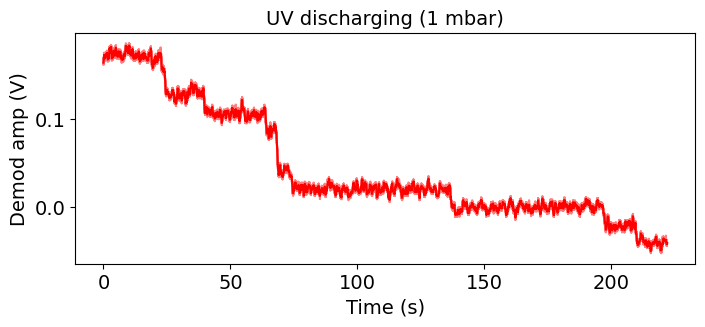

In [60]:
data_dir = r"D:\Data\charging"
prefix = '20240611_uvcharging_1mbar_nobias'
file_list = glob.glob(f"{data_dir}\{prefix}\*.mat")

tt, aa, pp = load_charging_files(file_list)

fig, ax = plt.subplots(1, 1, figsize = (8, 3))

ax.plot(tt, aa, 'r', alpha=0.5, markersize=2.5)
ax.plot(tt, savgol_filter(aa, 500, 1), 'r', markersize=0.3)
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Demod amp (V)', fontsize=14)
ax.set_title(r'UV discharging (1 mbar)', fontsize=14)

Text(0.5, 1.0, 'UV discharging (0.1 mbar)')

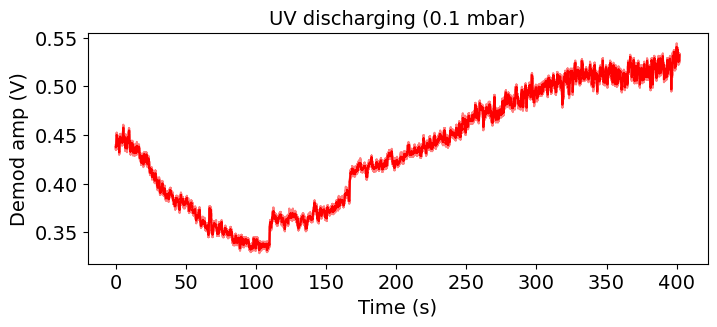

In [61]:
prefix = '20240611_uvcharging_0_1mbar_nobias'
file_list = glob.glob(f"{data_dir}\{prefix}\*.mat")

tt, aa, pp = load_charging_files(file_list)

fig, ax = plt.subplots(1, 1, figsize = (8, 3))

ax.plot(tt, aa, 'r', alpha=0.5, markersize=2.5)
ax.plot(tt, savgol_filter(aa, 500, 1), 'r', markersize=0.3)
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Demod amp (V)', fontsize=14)
ax.set_title(r'UV discharging (0.1 mbar)', fontsize=14)

Text(0.5, 1.0, 'UV discharging at $2 \\times 10^{-7}$ mbar')

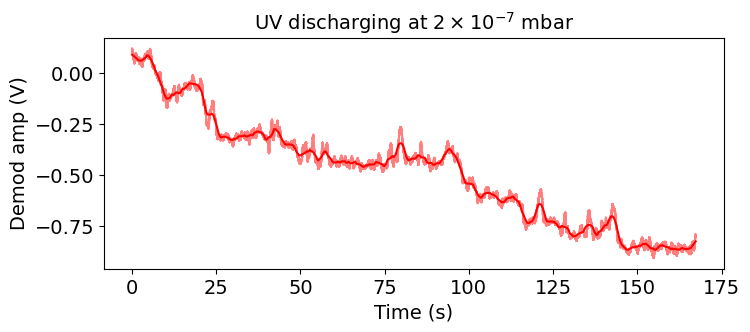

In [56]:
data_dir = r"D:\Data\charging"
prefix = '20240611_uvcharging_2e-7mbar_nobias'
file_list = glob.glob(f"{data_dir}\{prefix}\*.mat")

tt, aa, pp = load_charging_files(file_list)

fig, ax = plt.subplots(1, 1, figsize = (8, 3))

ax.plot(tt, aa, 'r', alpha=0.5, markersize=2.5)
ax.plot(tt, savgol_filter(aa, 50000, 1), 'r', markersize=0.3)
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Demod amp (V)', fontsize=14)
ax.set_title(r'UV discharging at $2 \times 10^{-7}$ mbar', fontsize=14)

# raw_charge = aa/(-1 * 0.0125)
# ax.plot(tt, raw_charge, 'r', alpha=0.5)

# ax.set_xlabel('Time (s)', fontsize=14)
# ax.set_ylabel('Charge (-$e$)', fontsize=14)
# ax.grid()

# charge = get_charge(aa, 0.0125)
# ax.plot(tt, charge, 'r')

Text(0.5, 1.0, 'Filament charging at $10^{-6}$ mbar')

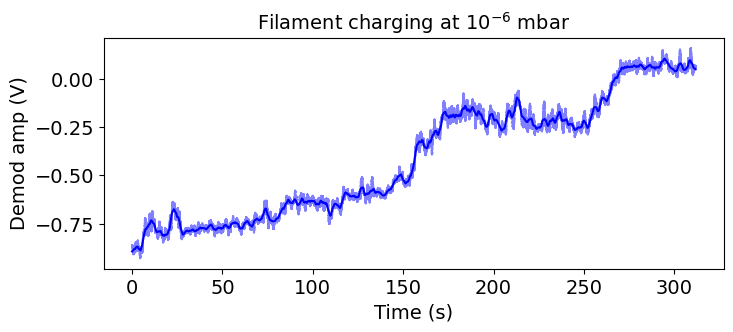

In [57]:
data_dir = r"D:\Data\charging"
prefix = '20240611_filament_1e-6mbar_nobias'
file_list = glob.glob(f"{data_dir}\{prefix}\*.mat")

tt, aa, pp = load_charging_files(file_list)

fig, ax = plt.subplots(1, 1, figsize = (8, 3))

ax.plot(tt, aa, 'b', alpha=0.5, markersize=2.5)
ax.plot(tt, savgol_filter(aa, 50000, 1), 'b', markersize=0.3)
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Demod amp (V)', fontsize=14)
ax.set_title(r'Filament charging at $10^{-6}$ mbar', fontsize=14)

In [39]:
# Shift forward by 0.1 s
arr = aa
step_guess = 0.035

shift_idx = int(arr.size / tt.max() * 0.1)
shifted_forward = np.roll(arr, shift_idx)
shifted_forward[:shift_idx] = arr[:shift_idx]

In [40]:
downard = True
arr - shifted_forward

array([ 0.       ,  0.       ,  0.       , ..., -0.0011598, -0.0011598,
        0.       ], dtype=float32)

In [ ]:

nonzeros = np.nonzero(arr - shifted_forward)[0]

good_idx = []
pivot = nonzeros[0]
for i, idx in enumerate(nonzeros):
    if len(good_idx) == 0:
        good_idx.append(idx)
    elif (tt[idx] - tt[pivot] > 1):
        good_idx.append(idx)
        pivot = idx
    else:
        pivot = idx
        continue
return np.asarray(good_idx) - 1

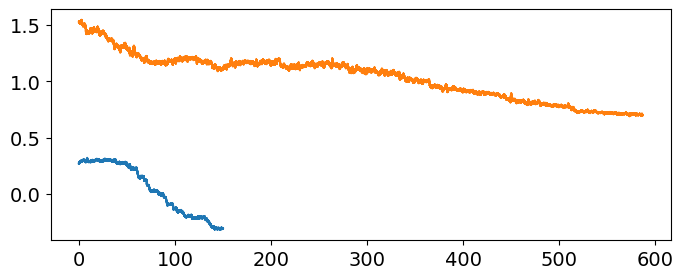

In [11]:
prefix = '20240608_uvcharging_0_1mbar_bias_100v_both'
file_list = glob.glob(f"{data_dir}\{prefix}\*.mat")
tt, aa, pp = load_charging_files(file_list)

ax.plot(tt, aa)
fig

In [143]:
def get_step_idx(arr, tt):
    shifted_forward = np.roll(arr, 1)
    shifted_forward[:1] = arr[:1]
    nonzeros = np.nonzero(arr - shifted_forward)[0]
    
    good_idx = []
    pivot = nonzeros[0]
    for i, idx in enumerate(nonzeros):
        if len(good_idx) == 0:
            good_idx.append(idx)
        elif (tt[idx] - tt[pivot] > 1):
            good_idx.append(idx)
            pivot = idx
        else:
            pivot = idx
            continue
    return np.asarray(good_idx) - 1

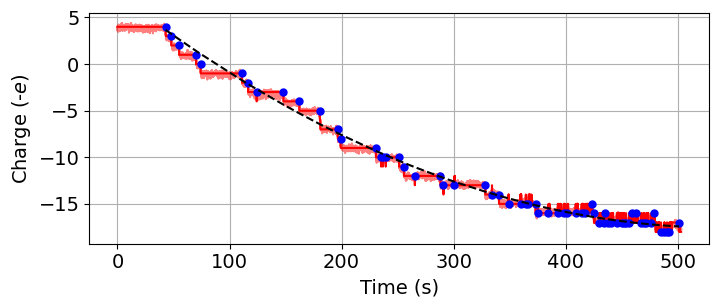

In [144]:
step_idx = get_step_idx(charge, tt)
ax.plot(tt[step_idx], charge[step_idx], 'b.', markersize=10)

poly = Polynomial.fit(tt[step_idx], charge[step_idx], deg=2)
ax.plot(tt[step_idx], poly(tt[step_idx]), 'k--')

fig

In [145]:
print(f'Emission rate at 0 charge: {np.abs(poly.deriv(m=1)(poly.roots()[0]))} electrons/s' )

Emission rate at 0 charge: 0.07759176186979234 electrons/s


In [146]:
def get_emission_rate(tt, aa, single_step=0.0125):
    charge = get_charge(aa, single_step)
    step_idx = get_step_idx(charge, tt)
    poly = Polynomial.fit(tt[step_idx], charge[step_idx], deg=2)
    return np.abs(poly.deriv(m=1)(poly.roots()[0]))